<h2><center>ASSIGNMENT 2</center></h2>
<h2><center>DEEP ASHISH JARIWALA, JAYDEEP SINGH</center></h2>
<h2><center>GROUP - 31</center></h2>
<h2><center>Q: CM1</center></h2>

# SEED DATASET

#### IMPORTING LIBRARIES

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from mlxtend.plotting import plot_confusion_matrix

#### IMPORTING THE DATASET

<p>To construct the data, seven geometric parameters of wheat kernels were measured:<p>
<ul>
            <li>area A.</li>
            <li>perimeter P.</li>
            <li>compactness C = 4*pi*A/P^2.</li>
            <li>length of kernel.</li>
            <li>width of kernel.</li>
            <li>asymmetry coefficient.</li>
            <li>length of kernel groove.</li>
            <li>target (three different varieties of wheat): Kama (1), Rosa (2) and Canadian (3).</li>
</ul>

In [46]:
dataset = pd.read_csv('seeds_dataset.txt', sep="\t", error_bad_lines=False, warn_bad_lines=True)
dataset.columns=['area','perimeter','compactness','length_kernel','width_kernel','asymmetry_coeff','length_of_kernel_groove','target']
dataset.head(5)

b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_of_kernel_groove,target
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


#### EXPLORATORY DATA ANALYSIS

C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DEEP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


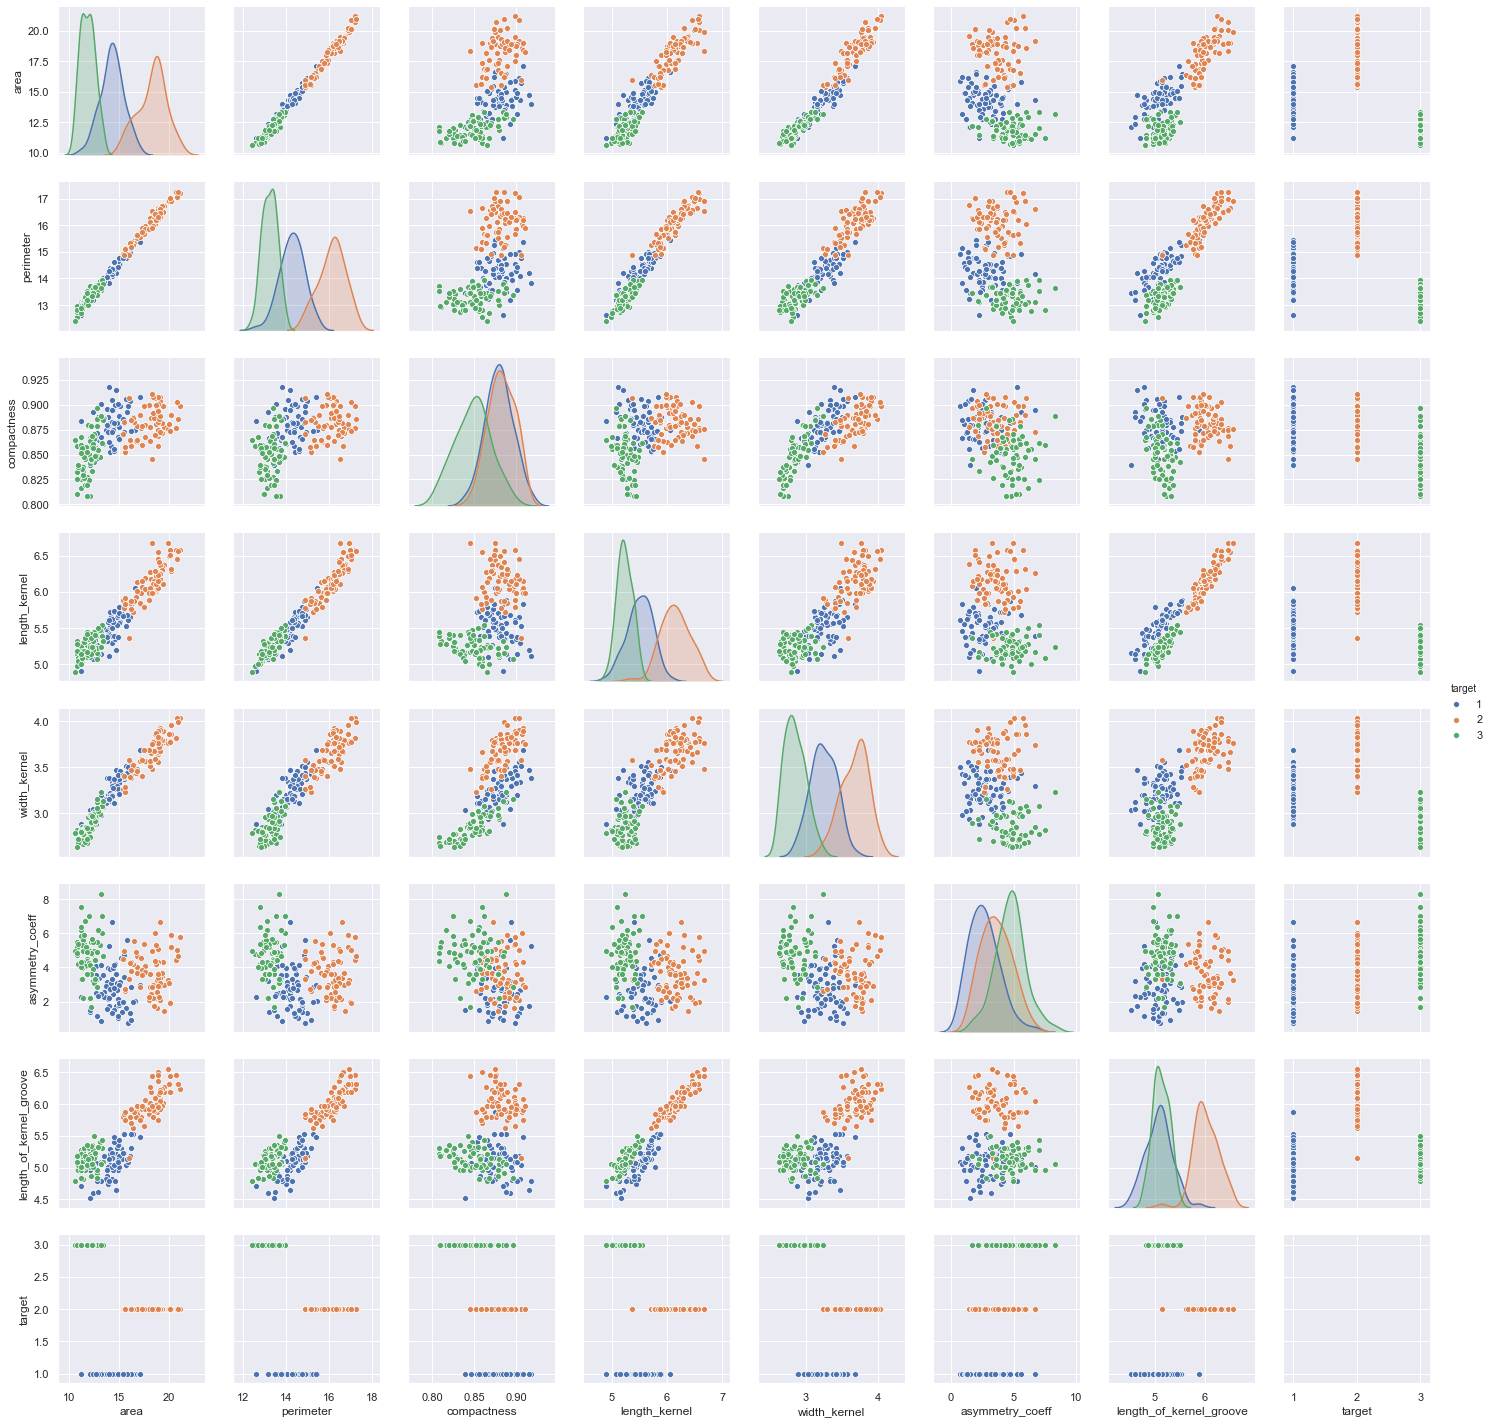

In [47]:
sns.pairplot(dataset, hue = 'target')

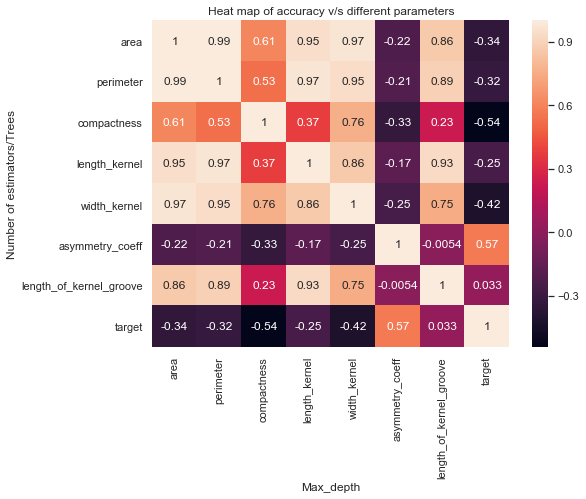

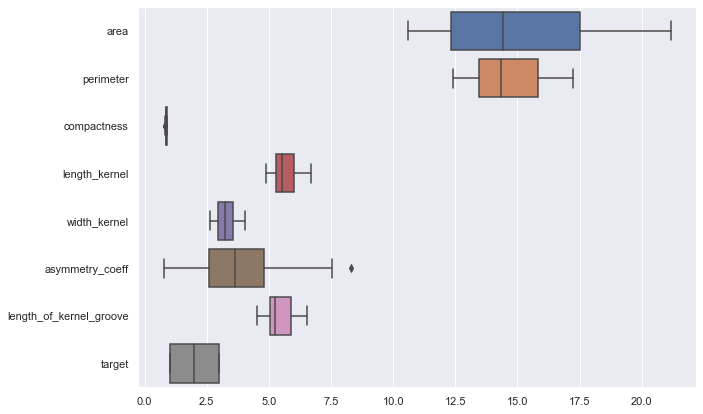

In [48]:
correlation_data = dataset.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_data, annot= True, cbar= True)
plt.xlabel("Max_depth")
plt.ylabel("Number of estimators/Trees")
plt.title("Heat map of accuracy v/s different parameters")


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = dataset, orient='h', ax=ax)

<p>The following steps are performed as a part of preprocessing the dataset into training set. All the important statistical observations are also included.</p>
<ul>
            <li>All the missing and irregular values are removed by read_csv command using the parameter error_bad_lines.</li>
            <li>The dataset was clean with only single outlier in asymmetric coefficient which has not been changed as this does not impact the accuracy on a large scale.</li>
            <li>Many variables like Area,Perimeter,length and width were strongly correlated. The correlation of target was strongest with asymmetric_coeff and high negative correlation with compactness.</li>
            <li>Pair plot is used to highlight relation among the variables and check any linear relationship or interesting pattern in the dataset.</li>
</ul>

#### PREPARING DATASET FOR TRAINING

In [49]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X, X_test, y, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X)
X_test_scaled = sc.transform(X_test)

<p> The dataset is splited into training and test using train_test_split method in sklearn. 80% dataset is used for training and then applied to grid search cv(using 10 fold cross validation) to tune the best parameters. The best tuned parameters are used to train the model again and is tested on the 20% test set seperated to get the final accuracy. All the splits and algorithm used are applied with random_state = 0.</p>

# DECISION TREE CLASSIFICATION ALGORITHM

#### TRAINING THE DATASET (WITHOUT NORMALIZATION) AND APPLYING GRID_SEARCH_CV METHOD 

In [50]:
dtclassifier = DecisionTreeClassifier(random_state = 0)
dtclassifier.fit(X, y)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
parameters = [{'max_depth': [3, 5, 10, None]}]
grid_search = GridSearchCV(estimator = dtclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best parameters obtained for Decision Tree Classification Algorithm:", best_parameters)
print("Best Accuracy obtained for Decision Tree Classification Algorithm at best parameters: {:.2f} %".format(best_accuracy*100))

Best parameters obtained for Decision Tree Classification Algorithm: {'max_depth': 5}
Best Accuracy obtained for Decision Tree Classification Algorithm at best parameters: 91.75 %


#### TRAINING THE DATASET (WITH NORMALIZATION) AND APPLYING GRID_SEARCH_CV METHOD 

In [51]:
dtclassifier = DecisionTreeClassifier(random_state = 0)
dtclassifier.fit(X, y)

cv = KFold(n_splits=10, random_state=0, shuffle=True)
parameters = [{'max_depth': [3, 5, 10, None]}]
grid_search = GridSearchCV(estimator = dtclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X_train_scaled, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best parameters obtained for Decision Tree Classification Algorithm:", best_parameters)
print("Best Accuracy obtained for Decision Tree Classification Algorithm at best paramters: {:.2f} %".format(best_accuracy*100))

Best parameters obtained for Decision Tree Classification Algorithm: {'max_depth': 5}
Best Accuracy obtained for Decision Tree Classification Algorithm at best paramters: 91.75 %


<p>The box above shows GRID_SEARCH_CV method to find the best hyperparameters with and without normalization. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters. This case involves tuning of maximum depth of trees. The best parameters obtained for this case are: maximum depth of 5. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search parameter tuning). The validation accuracy on best parameters comes out to be same for both cases (with and without scaling the data). Generally, Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. Therefore, dataset without normalization is selected for final test accuracy.</p>

In [52]:
results

{'mean_fit_time': array([0.00069509, 0.00049846, 0.00059838, 0.00039849]),
 'std_fit_time': array([0.00045513, 0.00049871, 0.00048883, 0.00048805]),
 'mean_score_time': array([0.00019941, 0.00050213, 0.00019948, 0.00039935]),
 'std_score_time': array([0.00039883, 0.00050223, 0.00039897, 0.00048911]),
 'param_max_depth': masked_array(data=[3, 5, 10, None],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3},
  {'max_depth': 5},
  {'max_depth': 10},
  {'max_depth': None}],
 'split0_test_score': array([0.875 , 0.9375, 0.9375, 0.9375]),
 'split1_test_score': array([0.8125, 0.8125, 0.8125, 0.8125]),
 'split2_test_score': array([0.875, 0.875, 0.875, 0.875]),
 'split3_test_score': array([1.    , 1.    , 0.9375, 0.9375]),
 'split4_test_score': array([1., 1., 1., 1.]),
 'split5_test_score': array([0.8125, 0.8125, 0.875 , 0.875 ]),
 'split6_test_score': array([0.9375, 0.9375, 0.9375, 0.9375]),
 'split7_test_score': arr

The default parameters(max_depth = None) produces a depth of : 6


Text(0.5, 1.0, 'Graph of validation accuracy v/s tree depth')

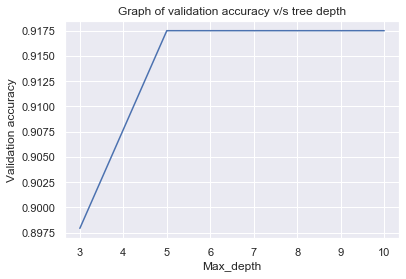

In [53]:
print(f"The default parameters(max_depth = None) produces a depth of : {dtclassifier.get_depth()}")
# values taken from GridSearchCV mean_test_score
mean_accuracy = [0.89791667, 0.9175    , 0.9175    , 0.9175 ]
depth = [3, 5, 6, 10]

plt.title('Accuracy v/s depth curve')
sns.lineplot(depth, mean_accuracy)
plt.xlabel("Max_depth")
plt.ylabel("Validation accuracy")
plt.title("Graph of validation accuracy v/s tree depth")

<p>The graph shows variation of accuracy with the changing values of max_depth of the tree. In this case, max_depth of 6 corresponds to default/None value</p>

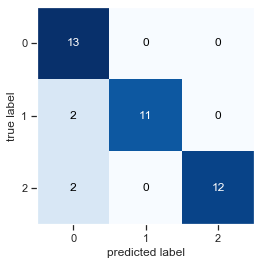

The accuracy obtained on test set with best tuned parameters: 90.0 % 


In [54]:
dtclassifier_final = DecisionTreeClassifier(max_depth = 5, random_state = 0)
dtclassifier_final.fit(X, y)

y_pred = dtclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters: {ac*100} % ")

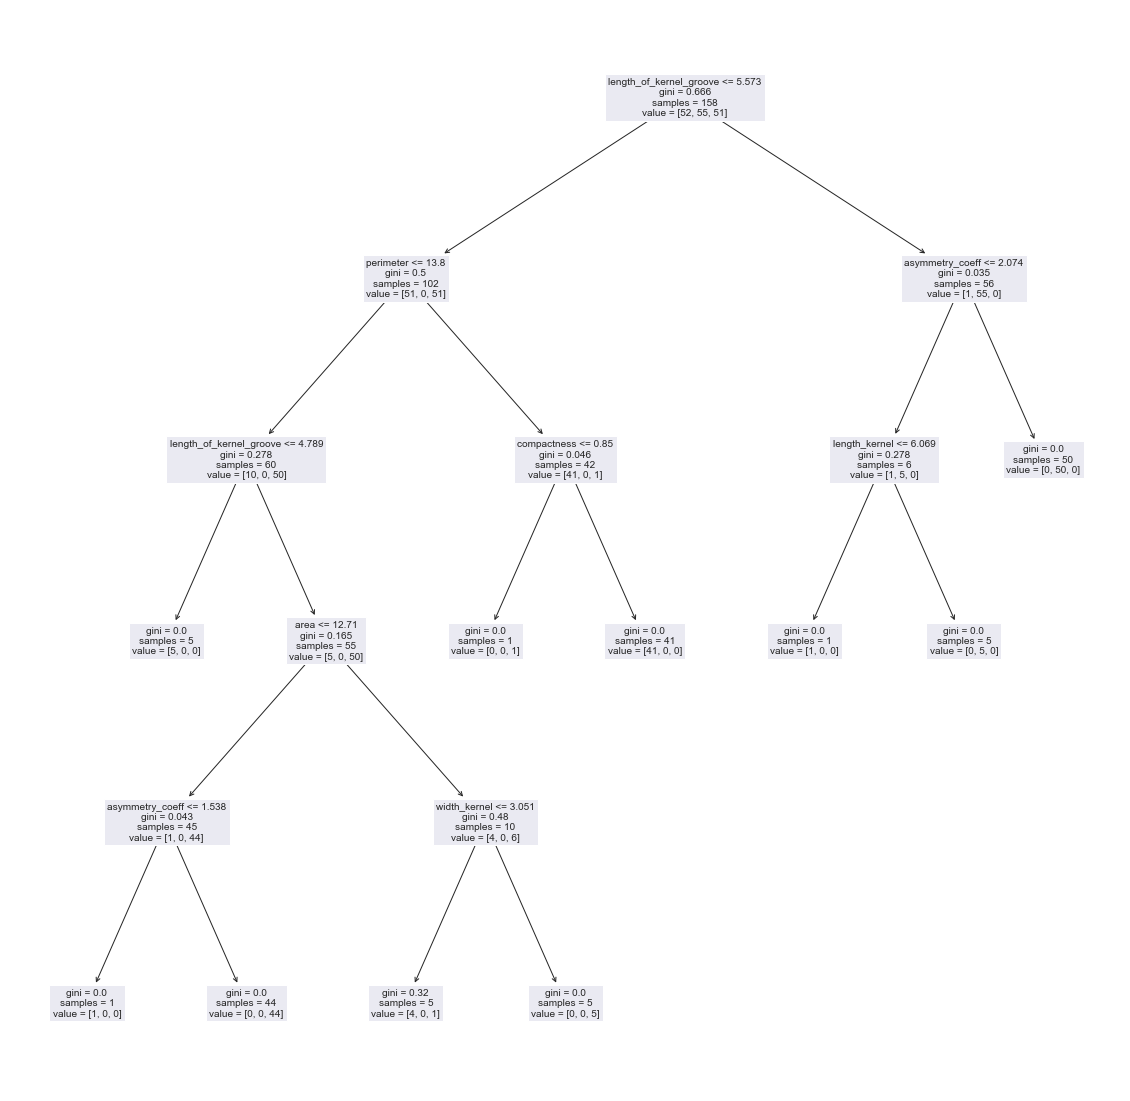

In [55]:
plt.figure(figsize=(20,20))
tree.plot_tree(dtclassifier_final, feature_names = list(dataset.columns))
plt.show()

<p>The cell above shows the spliting rules of the decision tree classifier based on the best parameters</p>
<ul>
            <li>ROOT NODE: length_of_kernel_groove 
                <div>less than 5.573: Seperates class 1 (Kama) and class 3 (Canadian) from class 2 (Roma)</div>
                <div>greater than 5.573: Seperates class 2 (Roma).</div></li>
            <li>TREE NODE 1: perimeter
                <div>less than 13.8: send majority value of class 3 (Canadian) with few expections of class 1(Kama).</div>
                <div>greater then 13.8: seperates class 1 (Kama).</div></li>
            <li>TREE NODE 2 and 3: length_of_kernel_groove and area
                <div>length of kernel groove greater than 4.789 and area less than 12.71: Class 3 is seperated.</div></li>
            <li>Finally at leaf node, we can see all the classes are seperated with majority of the nodes having 0 gini index indicating end of splitting.</li>
    <li><b>Important features resulting in majority splitting:</b> length of kernel groove (for rosa class 2), perimeter (for kama class 1),  length of kernel, perimeter and area (for class 3 canadian)</li>
</ul> 

# RANDOM FOREST CLASSIFICATION ALGORITHM

#### TRAINING THE DATASET (WITHOUT NORMALIZATION) AND APPLYING GRID_SEARCH_CV METHOD 

In [56]:
rfclassifier = RandomForestClassifier(random_state = 0)
rfclassifier.fit(X, y)

parameters = [{'n_estimators': [5, 10, 50, 150, 200], 'max_depth': [3, 5, 10, None]}]
grid_search = GridSearchCV(estimator = rfclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best parameters obtained for Random forest Classifier:", best_parameters)
print("Best Accuracy obtained for Random Forest Classifier at best parameters: {:.2f} %".format(best_accuracy*100))

Best parameters obtained for Random forest Classifier: {'max_depth': 5, 'n_estimators': 10}
Best Accuracy obtained for Random Forest Classifier at best parameters: 91.75 %


#### TRAINING THE DATASET (WITH NORMALIZATION) AND APPLYING GRID_SEARCH_CV METHOD 

In [57]:
rfclassifier = RandomForestClassifier(random_state = 0)
rfclassifier.fit(X, y)

parameters = [{'n_estimators': [5, 10, 50, 150, 200], 'max_depth': [3, 5, 10, None]}]
grid_search = GridSearchCV(estimator = rfclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X_train_scaled, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best parameters obtained for Random forest Classifier:", best_parameters)
print("Best Accuracy obtained for Random Forest Classifier at best parameters: {:.2f} %".format(best_accuracy*100))

Best parameters obtained for Random forest Classifier: {'max_depth': 5, 'n_estimators': 10}
Best Accuracy obtained for Random Forest Classifier at best parameters: 91.75 %


<p>The box above shows GRID_SEARCH_CV method to find the best parameters with and without normalization. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters. This case involves tuning of maximum depth of trees and number of estimators to be used. The best parameters obtained for this case are: maximum depth of 5 and number of estimators as 10. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search parameter tuning). The validation accuracy on best parameters comes out to be same for both cases (with and without scaling the data). Generally, Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. Therefore, dataset without normalization is selected for final test accuracy.</p>

In [58]:
results

{'mean_fit_time': array([0.00558615, 0.00847392, 0.05724685, 0.1642601 , 0.21562183,
        0.00608361, 0.01087041, 0.05884247, 0.17084291, 0.2053503 ,
        0.00359015, 0.01007285, 0.05934119, 0.17463253, 0.19487839,
        0.00388973, 0.01236694, 0.06263237, 0.17752483, 0.16316748]),
 'std_fit_time': array([0.00101803, 0.00168285, 0.0031915 , 0.01246578, 0.01628565,
        0.00069852, 0.00157378, 0.0017273 , 0.00992397, 0.03902452,
        0.00048846, 0.00220541, 0.00289913, 0.00645511, 0.04811454,
        0.00029919, 0.00048868, 0.00677598, 0.00792867, 0.0420364 ]),
 'mean_score_time': array([0.0008976 , 0.00129662, 0.00678172, 0.01565864, 0.02353823,
        0.00079808, 0.00169561, 0.00648272, 0.01845086, 0.02014632,
        0.00069818, 0.00149615, 0.00648267, 0.01825128, 0.01735363,
        0.00069816, 0.00189507, 0.00658228, 0.01845069, 0.01426122]),
 'std_score_time': array([0.00053751, 0.0004571 , 0.0011631 , 0.0028917 , 0.00127387,
        0.00039904, 0.0004571 , 0.000668

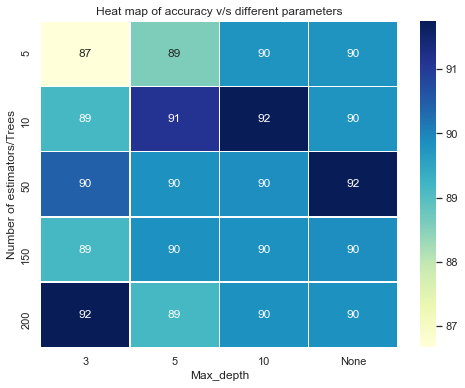

In [59]:
mean_accuracy_score = grid_search.cv_results_['mean_test_score']
arr = np.array(mean_accuracy_score*100)
arr = arr.reshape(5,4)
df = pd.DataFrame(arr, index = ['5','10','50','150','200'], columns = ['3','5','10','None'])

plt.figure(figsize=(8,6))
sns.heatmap(df, annot = True, linewidth = 0.5, cmap = "YlGnBu")
plt.xlabel("Max_depth")
plt.ylabel("Number of estimators/Trees")
plt.title("Heat map of accuracy v/s different parameters")


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

<p>The heat plot above shows a relationship between number of estimators and maximum depth to obtain tuned parameters. The tuned parameters (max_depth = 5 and number of estimators = 10) shows the maximum accuracy of 91.75%</p>

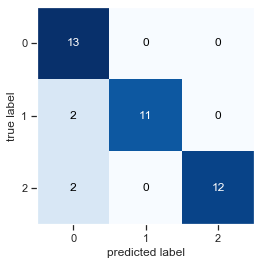

The accuracy obtained on test set with best tuned parameters: 90.0 % 


In [60]:
rfclassifier_final = RandomForestClassifier(n_estimators = 10, max_depth = 5, random_state = 0)
rfclassifier_final.fit(X, y)

y_pred = rfclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters: {ac*100} % ")

# GRADIENT BOOSTING CLASSIFICATION ALGORITHM

#### TRAINING THE DATASET (WITHOUT NORMALIZATION) AND APPLYING GRID_SEARCH_CV METHOD 

In [61]:
gbclassifier = GradientBoostingClassifier(random_state = 0)
gbclassifier.fit(X, y)

parameters = [{'n_estimators': [5, 10, 50, 150, 200]}]
grid_search = GridSearchCV(estimator = gbclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best parameters obtained for Gradient tree boosting Classification Algorithm:", best_parameters)
print("Best Accuracy obtained for Gradient Tree boosting Classifier at best parameters: {:.2f} %".format(best_accuracy*100))

Best parameters obtained for Gradient tree boosting Classification Algorithm: {'n_estimators': 150}
Best Accuracy obtained for Gradient Tree boosting Classifier at best parameters: 91.71 %


#### TRAINING THE DATASET (WITH NORMALIZATION) AND APPLYING GRID_SEARCH_CV METHOD 

In [62]:
gbclassifier = GradientBoostingClassifier(random_state = 0)
gbclassifier.fit(X, y)

parameters = [{'n_estimators': [5, 10, 50, 150, 200]}]
grid_search = GridSearchCV(estimator = gbclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = cv,
                           n_jobs = -1)
grid_search.fit(X_train_scaled, y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
results = grid_search.cv_results_
print("Best parameters obtained for Gradient tree boosting Classification Algorithm:", best_parameters)
print("Best Accuracy obtained for Gradient Tree boosting Classifier at best parameters: {:.2f} %".format(best_accuracy*100))

Best parameters obtained for Gradient tree boosting Classification Algorithm: {'n_estimators': 150}
Best Accuracy obtained for Gradient Tree boosting Classifier at best parameters: 91.71 %


<p>The box above shows GRID_SEARCH_CV method to find the best parameters with and without normalization. This method utilizes the concept of K-fold cross validation to evaluate the model on different parameters.This case involves tuning of maximum depth of trees and number of estimators to be used. The best parameter obtained for this case: number of estimators as 150. The box below shows all the results (for all the folds, mean accuracy, ranked test score among all the splits and computation time for grid search parameter tuning). The validation accuracy on best parameters comes out to be same for both cases (with and without scaling the data). Generally, Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. Therefore, dataset without normalization is selected for final test accuracy.</p>

In [63]:
results

{'mean_fit_time': array([0.0164571 , 0.02623274, 0.09454691, 0.27372167, 0.35911374]),
 'std_fit_time': array([0.00102254, 0.0066054 , 0.00598496, 0.01083919, 0.01965425]),
 'mean_score_time': array([0.00049815, 0.00069864, 0.00049863, 0.00049856, 0.00069706]),
 'std_score_time': array([0.00066857, 0.00045737, 0.00049863, 0.00049856, 0.00045635]),
 'param_n_estimators': masked_array(data=[5, 10, 50, 150, 200],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50},
  {'n_estimators': 150},
  {'n_estimators': 200}],
 'split0_test_score': array([0.9375, 0.875 , 0.9375, 0.9375, 0.9375]),
 'split1_test_score': array([0.8125, 0.8125, 0.75  , 0.75  , 0.75  ]),
 'split2_test_score': array([0.875 , 0.8125, 0.8125, 0.875 , 0.875 ]),
 'split3_test_score': array([1., 1., 1., 1., 1.]),
 'split4_test_score': array([1., 1., 1., 1., 1.]),
 'split5_test_score': array([0.

Text(0.5, 1.0, 'plot of validation accuracy v/s number of estimators')

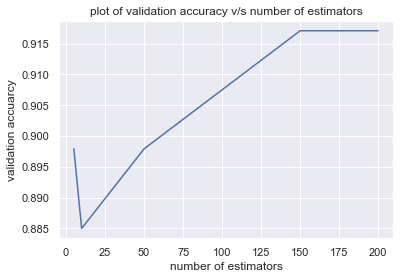

In [64]:
mean_acc = grid_search.cv_results_['mean_test_score']
estimators = [5, 10, 50, 150, 200]
plt.plot(estimators, mean_acc)
plt.xlabel("number of estimators")
plt.ylabel("validation accuarcy")
plt.title("plot of validation accuracy v/s number of estimators")

<p>The graph shows the variation of number of estimators v/s mean accuracy. The graph also verifies the best parameter of number of estimator as 150.</p>

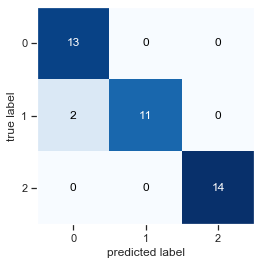

The accuracy obtained on test set with best tuned parameters: 95.0 % 


In [65]:
gbclassifier_final = GradientBoostingClassifier(n_estimators = 150, random_state = 0)
gbclassifier_final.fit(X, y)

y_pred = gbclassifier_final.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
ac = accuracy_score(y_test, y_pred)
print(f"The accuracy obtained on test set with best tuned parameters: {ac*100} % ")

# COMPARISION OF ALL THE ALGORITHM FOR SEED DATASET

<table>
  <tr>
    <th>Classifier</th>
    <th>Best Parameters</th>
    <th>Average validation Accuracy</th>
    <th>Test Accuracy</th>
    <th>Normalization/ feature scaling applied</th>
    <th>mean fit time(computation time)</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>Max_depth = 5, min_sample_leaf = 1</td>
    <td>91.75%</td>
    <td>90%</td>
    <td>No</td>
    <td>93.8 ms</td>
   </tr>
<tr>
    <td>Random Forest Classifier</td>
    <td>Max_depth = 5, n_estimators = 10</td>
    <td>91.75%</td>
    <td>90%</td>
    <td>No</td>
    <td>107.9 ms</td>
   </tr>
<tr>
    <td>Gradient Boosting Classifier</td>
    <td>n_estimators = 150</td>
    <td>91.71%</td>
    <td>95%</td>
    <td>No</td>
    <td>176 ms</td>
   </tr>
      <tr>
    <td>Decision Tree</td>
    <td>Max_depth = 5, min_sample_leaf = 1</td>
    <td>91.75%</td>
    <td>---</td>
    <td>Yes</td>
    <td>93.8 ms</td>
   </tr>
<tr>
    <td>Random Forest Classifier</td>
    <td>Max_depth = 5, n_estimators = 10</td>
    <td>91.75%</td>
    <td>---</td>
    <td>Yes</td>
    <td>107.9 ms</td>
   </tr>
<tr>
    <td>Gradient Boosting Classifier</td>
    <td>n_estimators = 150</td>
    <td>91.71%</td>
    <td>---</td>
    <td>Yes</td>
    <td>176 ms</td>
   </tr>
</table>

<h2>References</h2>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html</a>

<a>https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree</a>

<a>https://scikit-learn.org/stable/index.html</a>

<a>https://scikit-learn.org/stable/modules/classes.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html</a>

<a>http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix/</a>

<a>https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo</a>

<a>http://seaborn.pydata.org/</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html</a>

<a>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html</a>

<a>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html</a>